In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
"""
import sys
sys.path.append("/Users/dixu/Desktop/interfacial_analysis")
from interface import *
"""

Populating the interactive namespace from numpy and matplotlib


/Users/dixu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


'\nimport sys\nsys.path.append("/Users/dixu/Desktop/interfacial_analysis")\nfrom interface import *\n'

In [2]:
#readin histogram data
def histo(file):
    f = open(file)
    heading=None
    x,y=[],[]
    for line in f:
        if line.startswith("#"):
            continue
        wd=line.split(" ")
        if not heading: #heading not defined
            heading=wd
        else:
            x.append(wd[1])
            y.append(wd[3])
    f.close()
    x = np.array(map(float,x))
    y = np.array(map(float,y))
    f.close()
    return x,y

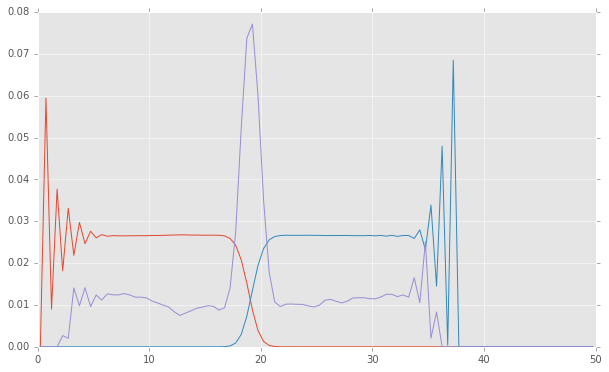

In [3]:
#plot histogram
folder="/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/explores/TB9_Changed/"
histoA=folder+"polyA.histo"
histoB=folder+"polyB.histo"
histoF=folder+"filler.histo"
Ax,Ay=histo(histoA)
Bx,By=histo(histoB)
Fx,Fy=histo(histoF)
plt.plot(Ax,Ay)
plt.plot(Bx,By)
plt.plot(Fx,Fy)

In [12]:
#readin histogram data
pf2=folder+"Player.txt"
f=open(pf2)
for i in range(3): #skip three line
    f.readline()
res=[]
for ind,line in enumerate(f):
    if ind%28==0:  #this value varies
        step=int(line.split()[0])
        continue
    temp=str(step)+" "+line
    res.append(temp.split())
df=pd.DataFrame(res,columns=["Step","Layer","Cord","N","Px","Py","Pz"])
df=df.convert_objects(convert_numeric=True)

/Users/dixu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


(-0.2, 0.6)

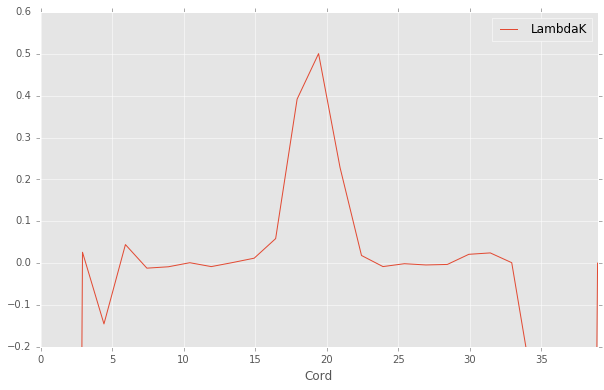

In [17]:
df[df["Step"] == 10000000] #step selection
df["LambdaK"]=-2*(df["Pz"]-0.5*(df["Px"]+df["Py"])) #2 is the bin size
df[df["Step"]==10000000][["Cord","LambdaK"]].plot(x="Cord").set_ylim(-0.2,0.6)